In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import cv2
import os

np.random.seed(1234)

In [55]:
TEST_PREDICTIONS_FILENAME = "flip_test_test_predictions.pkl"
NUM_IMAGES_TO_SHOW = 8
NUM_COLS = 4
NUM_ROWS = NUM_IMAGES_TO_SHOW // NUM_COLS + int(NUM_IMAGES_TO_SHOW % NUM_COLS != 0)

In [56]:
def draw_landmarks(image, landmarks):
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(image, (x, y), 1, (128, 0, 128), 1, -1)
    return image

In [57]:
with open(TEST_PREDICTIONS_FILENAME, "rb") as fp:
    results = pickle.load(fp)
image_names = results["image_names"]
landmarks = results["landmarks"]

print("Images:", len(image_names))
print("Landmarks shape:", landmarks.shape)

if len(image_names) < NUM_IMAGES_TO_SHOW:
    raise RuntimeError(f"Choose less images to show, you have only {len(image_names)}")

Images: 10
Landmarks shape: (10, 971, 2)


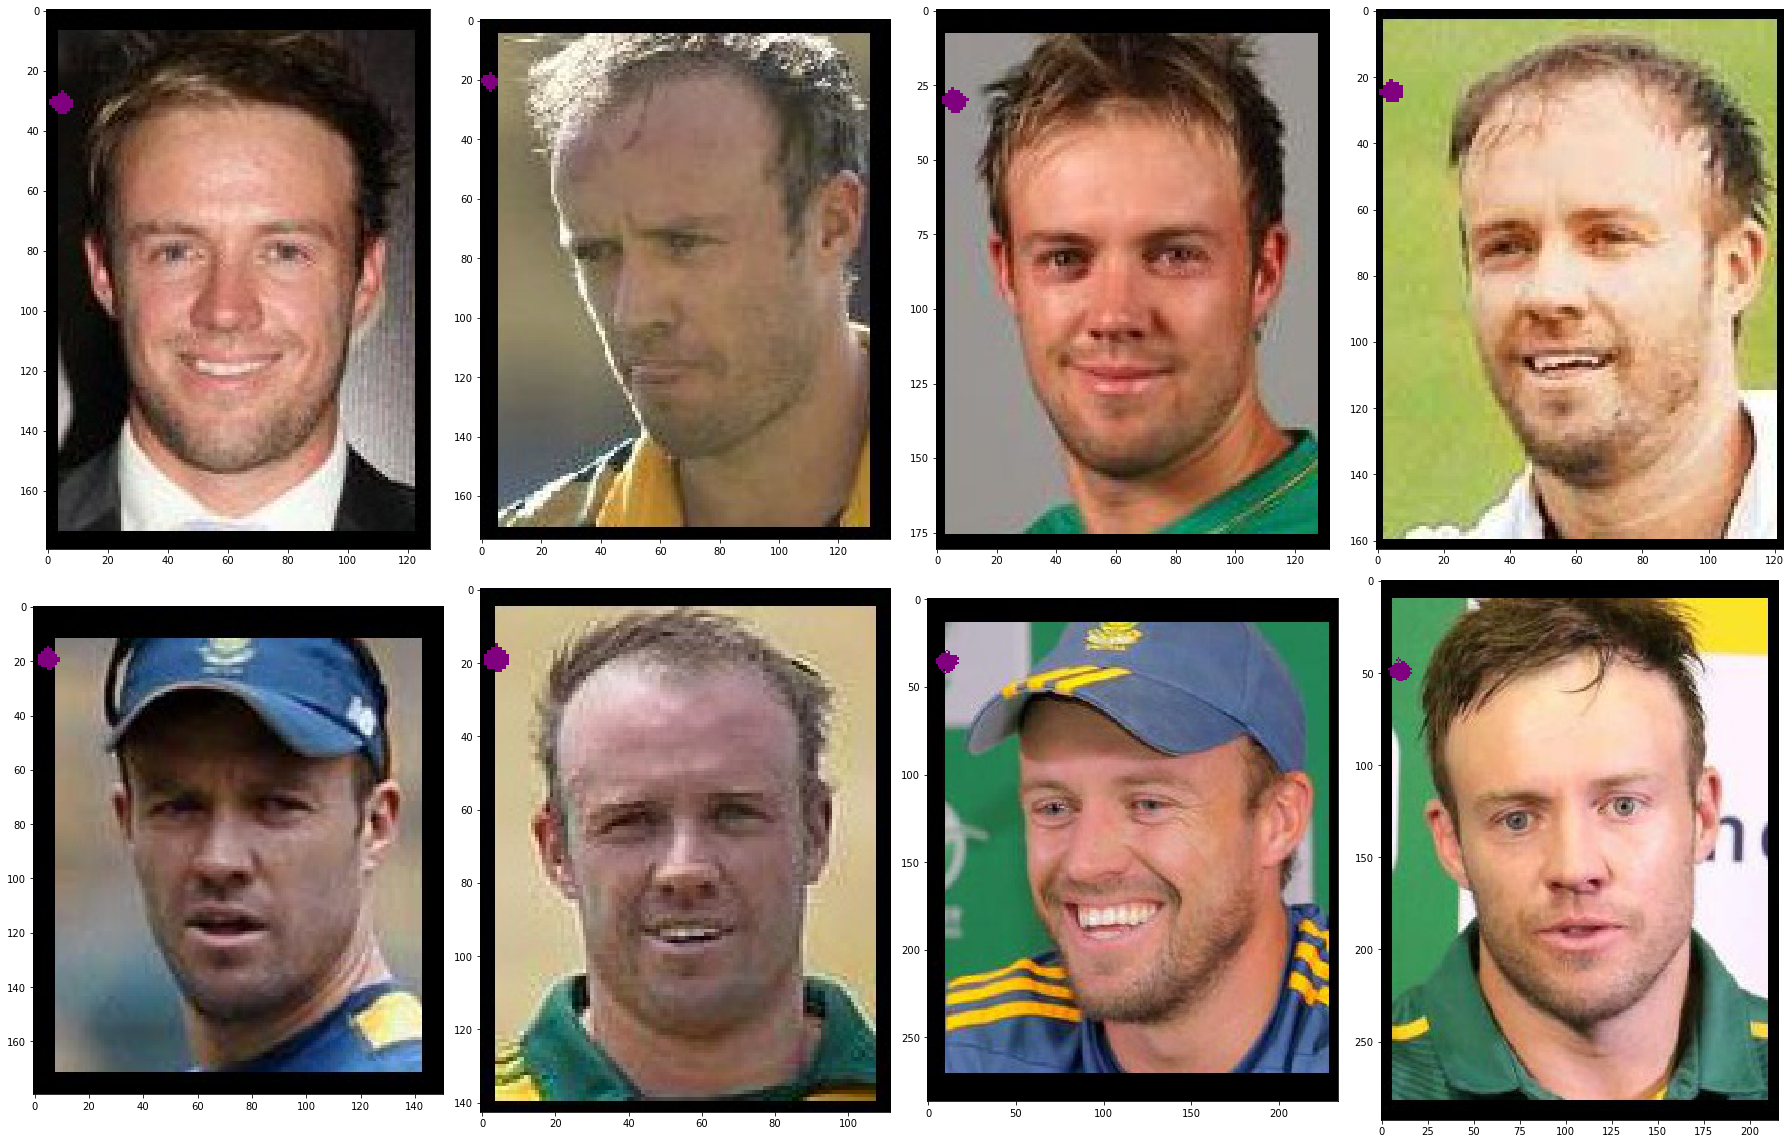

In [58]:
random_idxs = np.random.choice(len(image_names), size=min(NUM_IMAGES_TO_SHOW, len(image_names)), replace=False)

plt.figure(figsize=(25, NUM_ROWS * 8))
for i, idx in enumerate(random_idxs, 1):
    image = cv2.imread(image_names[idx])
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = draw_landmarks(image, landmarks[idx])
    
    plt.subplot(NUM_ROWS, NUM_COLS, i)
    plt.imshow(image)

plt.tight_layout()
plt.show()

## Test on small part of data

In [25]:
import os
import pandas as pd
import tqdm
import shutil

In [44]:
num_images = 16

train_flag = True

if train_flag:
    read_from = '../data/train/landmarks.csv'
    dest = '../data/small/train/landmarks.csv'
    
    src = '../data/train/images/'
    dest_img = '../data/small/train/images/'
else:
    read_from = '../data/test/test_points.csv'
    dest = '../data/small/test/test_points.csv'
    
    src = '../data/test/images/'
    dest_img = '../data/small/test/images/'

landmarks_df = pd.read_csv(read_from, nrows=num_images, delimiter='\t')
landmarks_df.to_csv(dest, index=False, sep='\t')
image_names = landmarks_df['file_name'].to_numpy()
print(image_names[0:10])


for file_name in image_names:
    full_file_name = os.path.join(src, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, dest_img)

['07c5e48d938e8d82c0f10973d66183f3.jpg'
 '1daf2e7328d121ec280c08f62926e2f9.jpg'
 '98d5186671bbcb31a79a16878a57de77.jpg'
 '12434863c3a9d9b8b3b0889a4d08d340.jpg'
 '28e70684d6e2d6d75a6d3a973e4d4d93.jpg'
 '4e6e471b0ef66d59e917986a51fbf108.jpg'
 '5556a64c83e21ac9f1e766aaa50df4a2.jpg'
 'b3c406127f3af5c7b480e1306622acc5.jpg'
 'a060d2fe5aa783851e87566089202a5b.jpg'
 'a35d9926d64f22148102bc2625d79f7d.jpg']


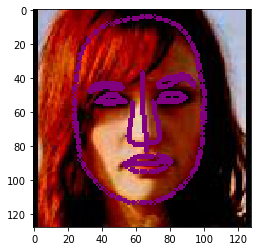

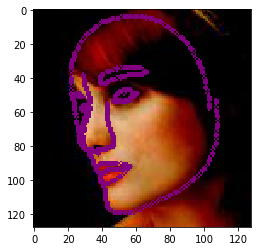

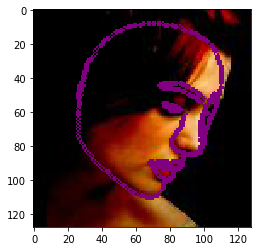

In [76]:
all_files = os.listdir('results')
for i in range(len(all_files) // 2):
    image = cv2.imread(f'results/img{i}.jpg')
    landmarks = np.load(f'results/{i}.pkl.npy')
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    draw_landmarks(image, landmarks.reshape(-1,2))
    plt.imshow(image)
    plt.show()

In [70]:
landmarks.reshape(-1,2)

array([[ 66.51528 , 110.47162 ],
       [ 65.397385, 109.91266 ],
       [ 64.27948 , 109.353714],
       ...,
       [ 68.75109 ,  89.7904  ],
       [ 79.93013 ,  57.371178],
       [101.729256,  61.283844]], dtype=float32)

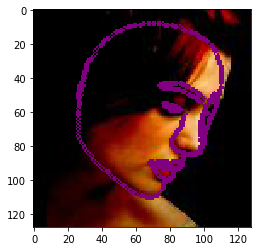

In [75]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
draw_landmarks(image, landmarks.reshape(-1,2))
plt.imshow(image)
plt.show()

## Test my own transformers

In [2]:
import os
import pandas as pd
import numpy as np
import tqdm
import cv2
import torchvision
import random
from matplotlib import pyplot as plt
from PIL import Image
import torch


In [79]:

def draw_landmarks(image, landmarks):
    new_image = image.copy()
    for point in landmarks:
        x, y = point.astype(np.int)
        cv2.circle(new_image, (x, y), 1, (128, 0, 128), 1, -1)
    return new_image

In [3]:
res = os.listdir('../data/train/images')
len(res)

393930

In [4]:
images = []
landmarks = []
with open('../data/train/landmarks.csv', "rt") as fp:
    for i, line in tqdm.tqdm(enumerate(fp)):
        if i > 100:
            break
        if i == 0:
            continue  # skip header
        elements = line.strip().split("\t")
        image_name = elements[0]

        images.append(image_name)
        lmarks = list(map(np.int16, elements[1:]))
        lmarks = np.array(lmarks, dtype=np.int16).reshape((len(lmarks) // 2, 2))
        landmarks.append(lmarks)


52it [00:00, 288.59it/s]


In [5]:
for el in landmarks[0:10]:
    print(el.shape)

(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)
(971, 2)


In [6]:
def get_item(idx, images, landmarks):
    sample = {}
    if landmarks is not None:
        landmarks = landmarks[idx]
        sample["landmarks"] = landmarks

    image = cv2.imread(os.path.join('../data/train/images', images[idx]))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    sample["image"] = image
    return sample

In [109]:
sample = get_item(13, images, landmarks)

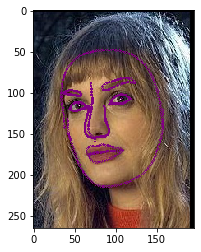

In [110]:
# plt.imshow(sample['image'])
img = draw_landmarks(sample['image'], sample['landmarks'])
plt.imshow(img)
plt.show()

In [93]:
sample['landmarks'].shape

(971, 2)

In [94]:
sample['image'].shape

(265, 196, 3)

In [95]:
class AffineAugmenter(object):
    def __init__(self, min_scale=0.9, max_scale=1.1, max_offset=0.1, 
                 angle = 10,
                 size=128, elem_name='image'):
        self._min_scale = min_scale
        self._max_scale = max_scale
        self._max_offset = max_offset
        self.angle = angle
        
        self.size = size
        self.elem_name = elem_name
    
    def __call__(self, sample):
        image = sample[self.elem_name]
        h, w, c = image.shape

        angle = random.random() * self.angle*2 - self.angle
        scale = self._min_scale + random.random() * (self._max_scale - self._min_scale)
        x_offset = random.randint(-int(self._max_offset * w), int(self._max_offset * w))
        y_offset = random.randint(-int(self._max_offset * h), int(self._max_offset * h))
        
        transform = cv2.getRotationMatrix2D((w // 2, h // 2), angle, scale)
        transform[:, 2] += [x_offset, y_offset]
        sample[self.elem_name] = cv2.warpAffine(image, transform, (w,h), borderValue=(128, 128, 128))
        
        # FIX HERE
        if 'landmarks' in sample:
            print(sample['landmarks'])
            landmarks = sample['landmarks'].reshape(-1, 2)
#             landmarks = cv2.warpAffine(image, transform, (w,h), borderValue=(128, 128, 128))
            landmarks @ transform
#             landmarks -= torch.tensor((margin_w, margin_h), dtype=landmarks.dtype)[None, :]
            sample['landmarks'] = landmarks.reshape(-1)

        return sample
        

# _pt = torch.ones(3)
# _pt[0] = point[0]
# _pt[1] = point[1]

# h = 200.0 * scale
# t = torch.eye(3)
# t[0, 0] = resolution / h
# t[1, 1] = resolution / h
# t[0, 2] = resolution * (-center[0] / h + 0.5)
# t[1, 2] = resolution * (-center[1] / h + 0.5)

# if invert:
#     t = torch.inverse(t)

# new_point = (torch.matmul(t, _pt))[0:2]

# return new_point.int()

In [127]:
class HFlip(object):
    
    def __init__(self, p=0.5, elem_name='image'):
        self.elem_name = elem_name
        self.prob = p
        
    def __call__(self, sample):
        if random.random() > self.prob:
            image = sample[self.elem_name]
            h, w, c = image.shape
            sample[self.elem_name] = cv2.flip(image, 1)
            sample['flipped'] = True

            if 'landmarks' in sample:
                landmarks = sample['landmarks'].reshape(-1,2)
                landmarks[:,0] = w - landmarks[:, 0]
    #             sample['landmarks'] = landmarks.reshape((len(landmarks) // 2, 2))
                sample['landmarks'] = landmarks
        else:
            sample['flipped'] = False
        return sample

(265, 196, 3)
(971, 2)


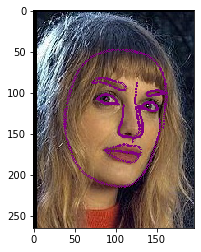

In [98]:
flipper = HFlip()

test_sample = sample.copy()
flipped = flipper(test_sample)
print(flipped['image'].shape)
print(flipped['landmarks'].shape)
img = draw_landmarks(flipped['image'], flipped['landmarks'])
plt.imshow(img)
plt.show()


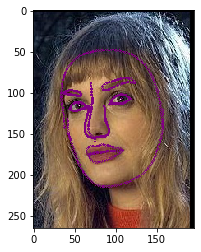

In [140]:
transform = torchvision.transforms.Compose([
#         AffineAugmenter(),
        HFlip(),
#         torchvision.transforms.ToTensor()
    ])

# augmenter = AffineAugmenter()
result_sample = transform(sample)
img = draw_landmarks(result_sample['image'], result_sample['landmarks'])
plt.imshow(img)
# plt.imshow(  transform(sample).permute(1, 2, 0)  )

In [142]:
a = np.array([[1,2,3,4,5],
              [10,20,30,40,50]
])

flip = np.array([True, False])

a[flip]

array([[1, 2, 3, 4, 5]])

In [77]:
import torchvision.models as models

In [150]:
model = models.

Downloading: "https://download.pytorch.org/models/resnet152-b121ed2d.pth" to /home/mikhail/.cache/torch/checkpoints/resnet152-b121ed2d.pth


KeyboardInterrupt: 